Unsatisfactory Performance of Logistic Regression: Suppose you are implementing a
simple logistic regression to solve a binary classification problem but you find unsatisfactory
results.

(a) What actions on your dataset would you consider to take in order to improve the
performance of the model?

Answer:
There are several actions needed to consider to improve the performance of the model:

- Feature Engineering: Reevaluvating the features used in the model. In order to get better capture in the data, we can consider creating new models or by transforming the existing ones.

- Data Selection: It is essential to analyze the importance of each feature using techniques like feature importance scores or feature selection methods.

- Data Cleaning: Checking for missing data and outliers and removing them if necessary.

- Data Scaling/Normalization: Normalizing features to ensure that they have similar scales.

- Hyperparameter Tuning: Experimenting with different hyperparameters like regularization strength, number of iterations, or learning rate to find best values to the model.

- Regularization: To prevent overfitting, applying regularization techniques like L1 or L2 regularization can improve the performance.

- Class Imbalance: If there is a class imbalance issue (i.e., one class significantly outnumbers the other), to balance the classes, consider using techniques like synthetic data generation, oversampling, or undersampling.

Reference: https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/

(b) What would you consider to try for the existing algorithm to improve the performance
of the model? Hint: Think about hyperparameters.

Answer:
There are several actions to be performed inorder to improve the performance of the models. Particularly focusing on hyperparameters, we can consider below actions:

- Learning Rate: To yield the best results, try experimenting with different learning rates to find the one that converges faster.

- Regularization Strength: Inorder to prevent overfitting, consider tuning the strength of regularization techniques like L1 or L2 regularization
.
- Number of Iterations: Sometimes, the model will not yield the accurate results with the default number of iterations. Increasing or decreasing the number of iterations (epochs) during training will improve the performance of the model. 

Reference: https://scikit-learn.org/stable/modules/grid_search.html

(c) What other algorithms would you consider to try in this case? Why? Explain.

Answer:
Below are few alternative algorithms I might consider.

- Decision trees: Able to handle both categorical and numerical features, as well as non-linear relationships between features and the target variable.

- Support Vector Machines: Effective in high dimensional spaces and versatile. Effective in cases where number of dimensions is greater than the number of samples. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Neural Networks: Learn and model the relationships between input and output data that are nonlinear and complex. They excel in image and text data, as well as sequential data. They are worth considering if you have access to a large amount of labeled data and computational resources.

Reference: 
https://gustavwillig.medium.com/decision-tree-vs-logistic-regression-1a40c58307d0#:~:text=Decision%20trees%20are%20often%20better,features%20and%20the%20target%20variable

https://www.datasciencecentral.com/alternatives-to-logistic-regression

https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,Effective%20in%20high%20dimensional%20spaces.

https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain.

Question - 2: 

(a) Build a mixed naive Bayes classifier for the Heart Disease Dataset used in lecture 6. In
this implementation, consider all 13 features (Recall that in this dataset, 8 features are
categorical and 5 features are continuous).

In [1]:
!pip install mixed-naive-bayes

In [3]:
# Data Preprocessing

# Loading the dataset
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import mlxtend
#reading csv file as dataframe
heart_df = pd.read_csv('heart.csv')


In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Defining the features and the target values of the model

X = heart_df[heart_df.columns[:-1]].values #Features
y = heart_df['target'].values#Target 

In [8]:
print(X)
print(y)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[0 0 0 ... 0 1 0]


In [9]:
# Feature Encoding & Scaling

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [11]:
print(X_train)
print(X_train.shape[0])

[[43.  1.  0. ...  2.  0.  3.]
 [58.  0.  0. ...  1.  0.  2.]
 [29.  1.  1. ...  2.  0.  2.]
 ...
 [35.  0.  0. ...  2.  0.  2.]
 [53.  1.  0. ...  0.  0.  3.]
 [54.  0.  2. ...  2.  0.  2.]]
820


In [12]:
print(X_test)
print(X_test.shape[0])

[[58.  1.  2. ...  1.  0.  3.]
 [53.  1.  0. ...  1.  2.  3.]
 [53.  0.  0. ...  1.  0.  2.]
 ...
 [54.  1.  0. ...  2.  0.  2.]
 [44.  1.  1. ...  2.  0.  2.]
 [54.  1.  2. ...  1.  0.  3.]]
205


In [13]:
print(y_train)
print(y_train.shape[0])

[1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 1 0 0 

In [14]:
print(y_test)
print(y_test.shape[0])

[1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1]
205


In [15]:
# Initialization

from mixed_naive_bayes import MixedNB

mnb = MixedNB(categorical_features = [1,2,5,6,8,10,11,12])
mnb.fit(X_train, y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [16]:
# Training the model

mnb.fit(X_train, y_train)

C:\Users\shubh\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
C:\Users\shubh\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [17]:
# Finding predictions for train and test sets

train_y_pred = mnb.predict(X_train)
test_y_pred = mnb.predict(X_test)

In [18]:
print(train_y_pred)
print(train_y_pred.shape[0])

[1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 1 0 1 0 1 

In [19]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1]
205


In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data

print('Mixed Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Mixed Gaussian NB Test Classification Report: \n\n', test_report)

# Reference from Lecture Notes - 6

Mixed Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.83      0.85       393
           1       0.85      0.88      0.86       427

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820
 


Mixed Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.81      0.85       106
           1       0.81      0.89      0.85        99

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



(b) How do you evaluate the performance of the mixed naive Bayes classifier in part (a)? How
do you compare the performance of the mixed naive Bayes classifier with the classical
and Gaussian naive Bayes classifiers constructed in lecture 6?

Answer:

Accuracy of classical Naive bayes classifier from lecture notes is 83% which got improved to 85% for mixed naive bayes classifier now.
Also, accuracy of Gaussian Naive bayes classifier from lecture notes is 74% which got improved to 85% for the mixed naive bayes classifier now. As we observe, all the other metrics improved from gaussian naive bayes classifier to Mixed gaussian naive bayes classification report.

(c) Is there a straightforward generalization of LDA/QDA classification algorithms to hybrid
datasets? Why? Explain.

Answer:

Because of its underlying presumptions and mathematical foundations, which are designed for continuous data,there is no straigntforward generalization for LDA/QDA to hybrid datasets.

Question - 3:
LDA vs. QDA: In this problem, you will compare the performances of the LDA and QDA
classifiers on a given dataset. The goal is to find out what classifier (between LDA and QDA)
is most appropriate to be applied in different cases. In this problem proceed as follows.

a) Download LDA-QDA-Toy-Data.csv and read the csv file into a dataframe. Regard x1 and
x2 columns as continuous features, and the y column as a binary categorical target. Split
the data into train and test with test size=0.3.

In [23]:
toy_df = pd.read_csv('LDA-QDA-Toy-Data.csv',index_col=[0])     # Reading the csv source file as a dataframe
toy_df.shape

(3000, 3)

In [24]:
toy_df.head()

,$x_1$,$x_2$,$y$
0,-9.968499,4.297527,1
1,1.311400,-7.549243,0
2,9.872124,7.567624,1
3,-2.854022,-6.178098,0
4,-4.800956,-7.973079,0


In [25]:
# Defining the features and the target of the model

X = toy_df[toy_df.columns[:-1]].values     # Features
y = toy_df[toy_df.columns[-1]].values      # Target 

In [26]:
print(X)
print(X.shape[0])

[[-9.968499    4.29752702]
 [ 1.31139999 -7.5492433 ]
 [ 9.87212367  7.56762365]
 ...
 [ 5.07559826  0.79384041]
 [ 3.10258788  5.69322169]
 [-2.98732318 -8.02187526]]
3000


In [27]:
print(y)
print(y.shape[0])

[1 0 1 ... 1 0 0]
3000


In [28]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Reference from Lecture Notes - 6

In [29]:
print(X_train)
print(X_train.shape[0])

[[ 3.5591752  -6.52292822]
 [-2.70518343 -0.19822184]
 [-0.49607839 -0.89936996]
 ...
 [-9.03558376 -4.12858728]
 [-1.22215815  5.62635861]
 [ 4.89350122  0.63736826]]
2250


In [30]:
print(X_test)
print(X_test.shape[0])

[[ 8.5418545   4.74058452]
 [-9.39465948 -0.36502483]
 [ 2.84835002  2.74006469]
 ...
 [ 4.77464731 -0.29674689]
 [ 3.39988838  4.91018776]
 [ 4.55879733 -6.11852214]]
750


In [31]:
print(y_train)
print(y_train.shape[0])

[0 1 0 ... 1 0 1]
2250


In [32]:
print(y_test)
print(y_test.shape[0])

[1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 1 1 1 

b) Train LDA and QDA classifiers on the train subset established in part (a). Find the
predictions of both classifiers for the test subset.

In [33]:
# Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis() # Instantiating the lda classifier
lda_clf.fit(X_train, y_train) # Fitting the train data

LinearDiscriminantAnalysis()

In [34]:
# Finding the predictions of the lda classifier for train and test subsets

lda_train_y_pred = lda_clf.predict(X_train)
lda_test_y_pred = lda_clf.predict(X_test)

# Reference from Lecture Notes - 6

In [35]:
print(lda_train_y_pred)
print(lda_train_y_pred.shape[0])

[0 0 0 ... 0 1 0]
2250


In [36]:
print(lda_test_y_pred)
print(lda_test_y_pred.shape[0])

[0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 

In [37]:
# Calculating trainm and test accuracy score

train_s= metrics.accuracy_score(y_train, lda_train_y_pred)
test_s= metrics.accuracy_score(y_test, lda_test_y_pred)
print('LDA Train Accuracy Score : ', train_s)
print('LDA Test Accuracy Score: ', test_s)

LDA Train Accuracy Score :  0.5293333333333333
LDA Test Accuracy Score:  0.552


(c) Calculate the relevant accuracy metrics by presenting the classification report for both
train and test subsets. Assess the two classifiers and contrast their performances.

In [38]:
 train_score = metrics.accuracy_score(y_train, lda_train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, lda_test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, lda_train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, lda_test_y_pred) # Generate classification report for test data
print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)


# Reference from Lecture Notes - 6

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.53      0.76      0.63      1166
           1       0.52      0.28      0.36      1084

    accuracy                           0.53      2250
   macro avg       0.53      0.52      0.50      2250
weighted avg       0.53      0.53      0.50      2250
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.56      0.76      0.64       399
           1       0.54      0.32      0.40       351

    accuracy                           0.55       750
   macro avg       0.55      0.54      0.52       750
weighted avg       0.55      0.55      0.53       750



LDA Classifier

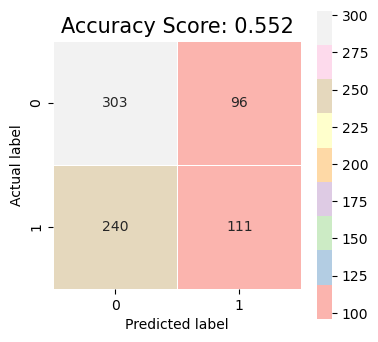

In [39]:
 # Computing lda confusion matrix
lda_c_matrix = confusion_matrix(y_test, lda_test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(lda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Reference from Lecture Notes - 6

In [40]:
 # Finding probabilities of test instances predicted by lda classifier
    
lda_clf.predict_proba(X_test[:10])

array([[0.52981922, 0.47018078],
       [0.48866608, 0.51133392],
       [0.51807464, 0.48192536],
       [0.47587698, 0.52412302],
       [0.5150249 , 0.4849751 ],
       [0.54083765, 0.45916235],
       [0.51343176, 0.48656824],
       [0.46286294, 0.53713706],
       [0.57263955, 0.42736045],
       [0.55987621, 0.44012379]])

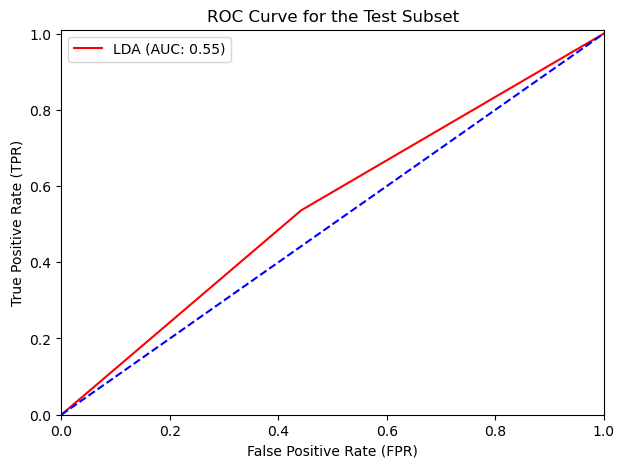

In [41]:
 # Plotting the ROC curve for the test subset
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' from sklearn
fpr, tpr, thresholds = roc_curve(lda_test_y_pred, y_test) # Computing ROC for the test subset
auc(fpr, tpr) # Computing AUC for the test subset
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='LDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Reference from Lecture Notes - 6

QDA Classifier

In [42]:
# Loading 'QuadraticDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis() # Instantiating the QDA classifier
qda_clf.fit(X_train, y_train) # Fitting the training data

# Reference from Lecture Notes - 6

QuadraticDiscriminantAnalysis()

In [43]:
# Finding predictions of qda classifier for the train and test subsets

qda_train_y_pred = qda_clf.predict(X_train)
qda_test_y_pred = qda_clf.predict(X_test)

In [44]:
print(qda_train_y_pred)
print(qda_train_y_pred.shape[0])

[0 1 0 ... 1 0 1]
2250


In [45]:
print(qda_test_y_pred)
print(qda_test_y_pred.shape[0])

[1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 1 1 1 

In [46]:
# Calculating the accuracy score of the Classifier

train_s= metrics.accuracy_score(y_train, qda_train_y_pred)
test_s= metrics.accuracy_score(y_test, qda_test_y_pred)
print('QDA Train Accuracy Score : ', train_s)
print('QDA Test Accuracy Score : ', test_s)

QDA Train Accuracy Score :  0.9253333333333333
QDA Test Accuracy Score :  0.9493333333333334


In [47]:
train_score = metrics.accuracy_score(y_train, qda_train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, qda_test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, qda_train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, qda_test_y_pred) # Generate classification report for test data
print('QDA Train Classification Report: \n\n', train_report,'\n\n')
print('QDA Test Classification Report: \n\n', test_report)

# Reference from Lecture Notes - 6

QDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1166
           1       0.97      0.88      0.92      1084

    accuracy                           0.93      2250
   macro avg       0.93      0.92      0.92      2250
weighted avg       0.93      0.93      0.93      2250
 


QDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95       399
           1       0.98      0.91      0.94       351

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



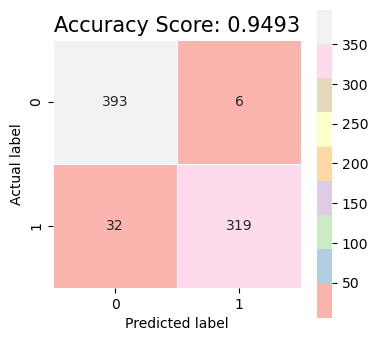

In [48]:
# Computing qda confusion matrix
qda_c_matrix = confusion_matrix(y_test, qda_test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(qda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Reference from Lecture Notes - 6

In [49]:
 # Finding probabilities of test instances predicted by qda classifier
    
qda_clf.predict_proba(X_test[:10])

array([[0.29980531, 0.70019469],
       [0.13411362, 0.86588638],
       [0.53108545, 0.46891455],
       [0.16922611, 0.83077389],
       [0.53370808, 0.46629192],
       [0.45080635, 0.54919365],
       [0.54914806, 0.45085194],
       [0.23032346, 0.76967654],
       [0.5484808 , 0.4515192 ],
       [0.33995878, 0.66004122]])

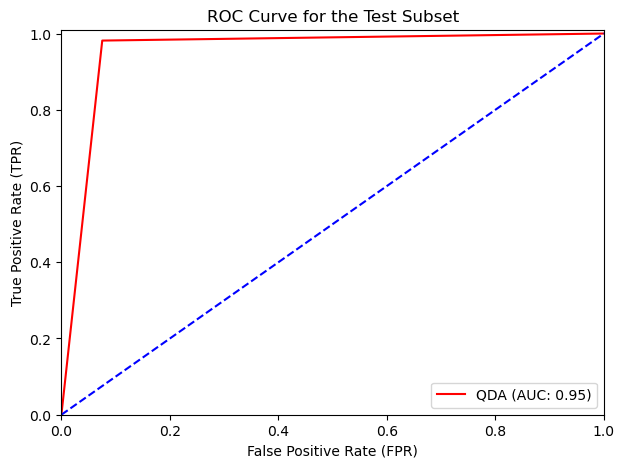

In [50]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(qda_test_y_pred, y_test) # Computing ROC for the test subset
auc(fpr, tpr) # Computing AUC for the test subset
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='QDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Reference from Lecture Notes - 6

QDA performed better than LDA, Accuracy of QDA is 95% and LDA is 55%

(d) Use plot decision regions from the plotting module of the mlxtend library to plot the
decision regions for the two classifiers in the two dimensional feature space formed by
x1 and x2 (revisit the “Binary Example” of lecture 4 to see how decision regions are
plotted).

In [51]:
!pip install mlxtend

In [52]:
import mlxtend

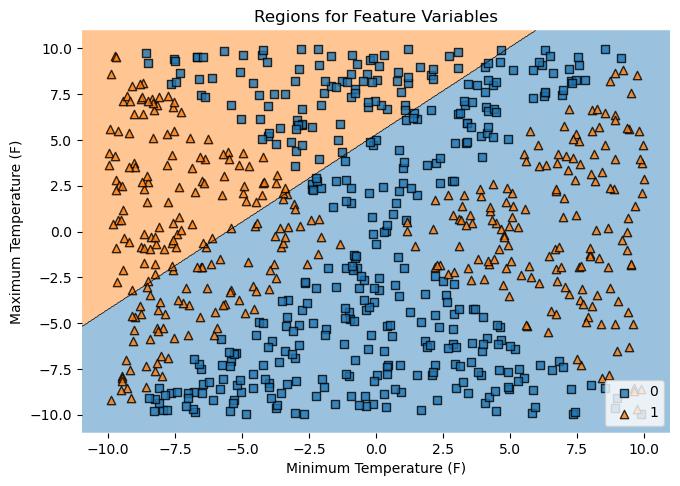

In [53]:
# Plotting the decision regions

from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=lda_clf) # Plotting the decision region
plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

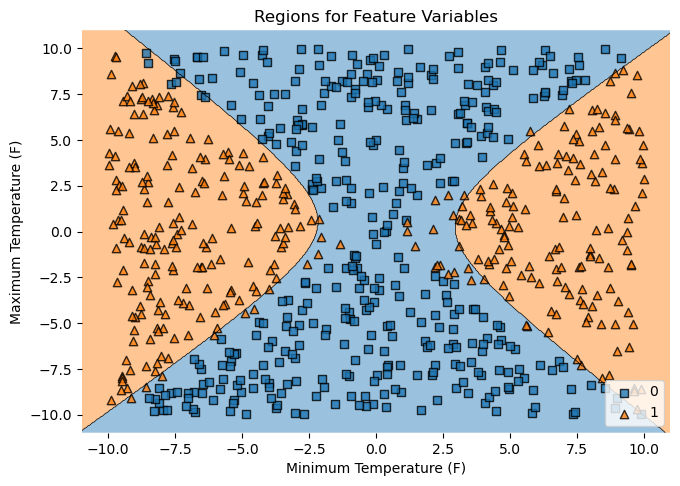

In [54]:
# Plotting the decision regions

from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=qda_clf) # Plotting the decision region
plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

(e) Based on your findings in parts (c) and (d) and your literature search, explain in what
situations it would be more appropriate to use QDA classifier. In what situations is the
LDA classifier the more appropriate choice of classifier?

- LDA has a linear decision surface

- ODA has no assumptions on the covariance matrices of the Gaussians, leading to quadratic decision surface.

- LDA tends to be a better than QDA when you have a small training set.

- for QDA the covariance matrix can be different for each class. 

- LDA makes a lot of assumptions, such as the 1) sample measurements are independent from each other 2) distributions are normal, and 3) co-variance of the measurements are identical across different classes.

- QDA assumes that each class follow a Gaussian distribution, and is more flexible than LDA.

Referece : 
https://scikit-learn.org/stable/modules/lda_qda.html#:~:text=From%20the%20above%20formula%2C%20it,leading%20to%20quadratic%20decision%20surfaces.

http://www.sthda.com/english/articles/36-classification-methods-essentials/146-discriminant-analysis-essentials-in-r/#:~:text=QDA%20is%20little%20bit%20more,have%20a%20small%20training%20set.

https://www.raybiotech.com/learning-center/linear-discriminant-analysis-model/#:~:text=LDA%20makes%20a%20lot%20of,are%20identical%20across%20different%20classes.

https://towardsdatascience.com/quadratic-discriminant-analysis-ae55d8a8148a#:~:text=QDA%20assumes%20that%20each%20class,that%20belong%20to%20the%20class.

Question - 4:
Random Forests vs. Gradient Boosting: Contrast and compare random forest and
gradient boosting classifiers from the point of view of

(a) internal structures of the algorithms

- Random Forest: Builds multiple decision trees and merges them to get a more accurate and stable prediction. Each tree is built independently.
- Gradient Boosting: Builds decision trees sequentially, where each tree tries to correct the errors of the previous one.

Reference:
https://www.tutorialspoint.com/random-forest-vs-gradient-boosting-algorithm

(b) being prone to overfitting

- Random Forest: Less prone to overfitting due to its random feature selection and averaging of multiple trees.
- Gradient Boosting: More prone to overfitting, especially if the number of trees is large or the learning rate is too high.

Reference:
https://www.tutorialspoint.com/random-forest-vs-gradient-boosting-algorithm

(c) tuning hyperparameters

- Random Forest: Requires tuning for parameters such as the number of trees and the number of features considered for each split.
- Gradient Boosting: Requires tuning for parameters such as the number of trees, learning rate, and tree-specific parameters like depth.

Reference:
https://towardsdatascience.com/understanding-ensemble-methods-random-forest-adaboost-and-gradient-boosting-in-10-minutes-ca5a1e305af2
https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

(d) execution time to train

- Random Forest: Generally faster to train as each tree can be built independently and in parallel.
- Gradient Boosting: Slower to train due to the sequential nature of building trees, which relies on the results of previous trees.

Reference:
https://www.tutorialspoint.com/random-forest-vs-gradient-boosting-algorithm

5. Classification Analysis: For this problem, use the csv file GateArrivalDelay-Classification.csv.
In this problem, you will employ several different classification algorithms on the data published by FAA to predict whether a gate will be experiencing arrival delay at the ORD airport.
The target variable in this problem is the Class which is a binary categorical variable (y = 0
corresponds to no delay, whereas y = 1 corresponds to an average of 15 minutes or more delay
for a gate at ORD airport). Potential features are
• % On-TimeGateArrivals
• AverageBlockDelay
• AverageTaxiInDelay
• AverageAirborneDelay
• AverageAirportDepartureDelay
• AverageGateDepartureDelay

(a) Determine the nature of the classification problem. Is the current classification problem
closer to a balanced classification or an unbalanced classification problem?

In [55]:
import pandas as pd

delay_df = pd.read_csv('GateArrivalDelay-Classification.csv', index_col=0)
# print(delay_df['Class'].value_counts())
delay_df


,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,Delay_Class
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,0
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,0
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,0
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,0
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,0
...,...,...,...,...,...,...,...,...
2202,2019-05-27 23:00:00,47.62,16.29,20.23,1.81,32.00,30.75,1
2203,2019-05-28 23:00:00,47.06,10.29,8.49,3.00,71.17,64.67,1
2204,2019-05-29 23:00:00,68.18,4.59,2.64,2.18,11.83,9.17,1
2205,2019-05-30 23:00:00,59.09,2.55,3.04,2.14,25.75,23.00,1


In [56]:
# To get more data about the nature of classification, firstly we need to check the unique classes in the target variable

delay_df.Delay_Class.unique()

array([0, 1], dtype=int64)

Since the Delay_Class column has 2 unique class, we can say it is a binary classifier.

In [57]:
# Now let's check the instances of each unique class 

print(delay_df['Delay_Class'].value_counts())
delay_df['Delay_Class'].value_counts()/len(delay_df)

0    1930
1     277
Name: Delay_Class, dtype: int64


0    0.87449
1    0.12551
Name: Delay_Class, dtype: float64

For the given problem, the number of instances of each class are significantly different, which makes it a unbalanced classifier. Class 0 is Majority class and Class 1 is Minority class.

(b) Construct a random forest classifier for the target Class in the presence of all 6 features.
Calculate the relative feature importance from the constructed forest and identify the two most significant features.

In [58]:
X=delay_df.drop(['Date_Time','Delay_Class'],axis=1)
y=delay_df['Delay_Class']
print(X)
print(X.shape[0])

      % On-TimeGateArrivals  AverageBlockDelay  AverageTaxiInDelay  \
0                     90.00               7.70                9.47   
1                     72.73               0.91                2.55   
2                     75.00               1.00                0.91   
3                     83.33               1.50                1.13   
4                     90.91               0.64                1.38   
...                     ...                ...                 ...   
2202                  47.62              16.29               20.23   
2203                  47.06              10.29                8.49   
2204                  68.18               4.59                2.64   
2205                  59.09               2.55                3.04   
2206                  90.91               1.27                5.71   

      AverageAirborneDelay  AverageAirportDepartureDelay  \
0                     0.60                         13.67   
1                     0.00             

In [59]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Reference from Lecture Notes - 6

In [60]:
print(X_train)
print(X_train.shape[0])

      % On-TimeGateArrivals  AverageBlockDelay  AverageTaxiInDelay  \
1042                  87.67               0.93                5.38   
670                   93.75               1.15                7.59   
1038                  90.00               2.69                3.95   
1907                  84.06               7.12                9.80   
875                   87.32               4.46                6.12   
...                     ...                ...                 ...   
789                   90.36               4.19               11.58   
968                   89.86               2.17                9.43   
1667                  85.57               4.09               11.79   
1688                  88.78               1.69                6.98   
1898                  88.24               1.28                8.34   

      AverageAirborneDelay  AverageAirportDepartureDelay  \
1042                  0.64                         15.11   
670                   2.31             

In [61]:
print(X_test)
print(X_test.shape[0])

      % On-TimeGateArrivals  AverageBlockDelay  AverageTaxiInDelay  \
1419                  79.17               6.81                9.87   
1145                  89.29               2.58                4.14   
1094                  75.61               9.46                3.75   
317                  100.00               9.00                8.10   
660                   90.79               5.46                7.97   
...                     ...                ...                 ...   
1984                  89.47               1.39                7.05   
181                  100.00               1.00                6.10   
1999                  50.00              30.29                7.07   
1979                  91.49               2.04                7.32   
258                  100.00               0.00                5.10   

      AverageAirborneDelay  AverageAirportDepartureDelay  \
1419                  4.50                         16.55   
1145                  2.50             

In [62]:
print(y_train)
print(y_train.shape[0])

1042    0
670     0
1038    0
1907    0
875     0
       ..
789     0
968     0
1667    0
1688    0
1898    0
Name: Delay_Class, Length: 1655, dtype: int64
1655


In [63]:
print(y_test)
print(y_test.shape[0])

1419    0
1145    0
1094    1
317     0
660     0
       ..
1984    0
181     0
1999    1
1979    0
258     0
Name: Delay_Class, Length: 552, dtype: int64
552


In [64]:
# Constructing a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=3)

In [65]:
# Finding the predictions of random forest classifier for train and test subsets
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [66]:
print(train_y_pred)
print(train_y_pred.shape[0])

[0 0 0 ... 0 0 0]
1655


In [67]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [68]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Random Forest Classifier Train Classification Report: \n\n',train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)


Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1436
           1       0.92      0.60      0.73       219

    accuracy                           0.94      1655
   macro avg       0.93      0.80      0.85      1655
weighted avg       0.94      0.94      0.94      1655
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.99      0.96       494
           1       0.84      0.45      0.58        58

    accuracy                           0.93       552
   macro avg       0.89      0.72      0.77       552
weighted avg       0.93      0.93      0.92       552



In [69]:
 # Constructing a new random forest classifier
rf_clf = RandomForestClassifier(n_estimators=3000, max_depth=6,max_leaf_nodes=8, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=8, n_estimators=3000,
                       random_state=3)

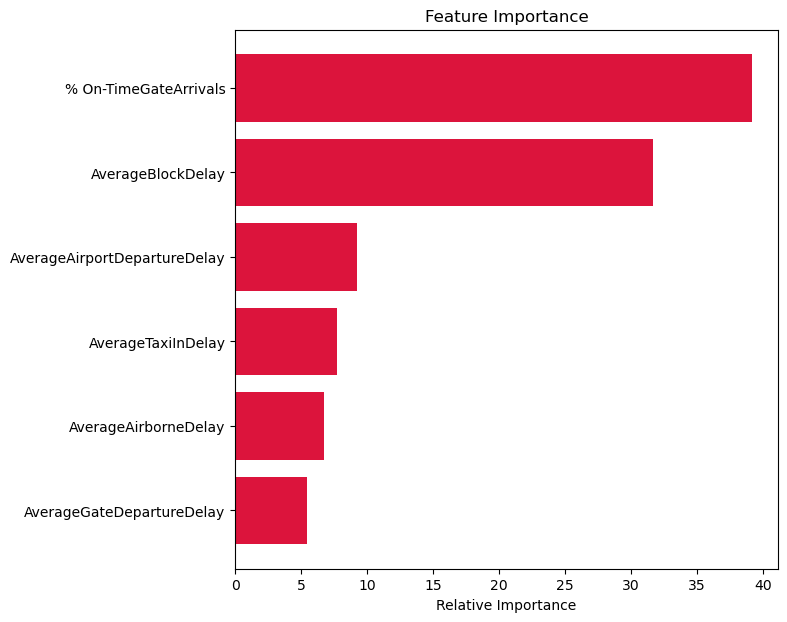

In [70]:
# Calculating the feature importance
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
#plt.yticks(pos, delay_df.columns[1:-1][sorted_idx])
plt.yticks(pos, X.columns[:][sorted_idx])
#plt.yticks(pos, np.array(['x_%d' %(i+1) for i in range(10)])[sorted_idx])
plt.show()

From the above figure, two significant features are '% On-TimeGateArrivals' and 'AverageBlockDelay'

In [71]:
# Defining the features and the target of the model

features = ['% On-TimeGateArrivals', 'AverageBlockDelay']      # Feature names 
target = delay_df.columns[-1]         # Target name

X = delay_df[features].values         # Features
y = delay_df[target].values           # Target 

#X = delay_df[['% On-TimeGateArrivals', 'AverageBlockDelay']].values         # Features
#y = delay_df[delay_df.columns[-1]].values           # Target 

In [72]:
print(X)
print(X.shape[0])

[[90.    7.7 ]
 [72.73  0.91]
 [75.    1.  ]
 ...
 [68.18  4.59]
 [59.09  2.55]
 [90.91  1.27]]
2207


In [73]:
print(y)
print(y.shape[0])

[0 0 0 ... 1 1 0]
2207


In [74]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [75]:
print(X_train)
print(X_train.shape[0])

[[87.67  0.93]
 [93.75  1.15]
 [90.    2.69]
 ...
 [85.57  4.09]
 [88.78  1.69]
 [88.24  1.28]]
1655


In [76]:
print(X_test)
print(X_test.shape[0])

[[ 79.17   6.81]
 [ 89.29   2.58]
 [ 75.61   9.46]
 ...
 [ 50.    30.29]
 [ 91.49   2.04]
 [100.     0.  ]]
552


In [77]:
print(y_train)
print(y_train.shape[0])

[0 0 0 ... 0 0 0]
1655


In [78]:
print(y_test)
print(y_test.shape[0])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [79]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[1930  277]
[1436  219]
[494  58]


Reference from Leture Notes - 8 & 4

(c) Construct a logistic regression classifier for the classification problem. Calculate various
relevant accuracy metrics, and assess the performance of your constructed classifier.
What is the AUC of the corresponding ROC curve for this binary classifier? Plot
decision regions in the feature space.

In [80]:
 from sklearn.linear_model import LogisticRegression # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression
logreg.fit(X_train, y_train) # Fitting the train data to 'logreg'


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

In [81]:
# Predicted class for the test subset through logistic regression

y_train_pred_prob = logreg.predict_proba(X_train) # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test) # Calculating probabilities of the two classes in test subset

# Presenting the probabilities for the 1st 10 instances in train subset
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
# Presenting the probabilities for the 1st 10 instances in test subset
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])


Train predictions for probabilities:

 [[0.98495639 0.01504361]
 [0.98761804 0.01238196]
 [0.97356436 0.02643564]
 [0.8332332  0.1667668 ]
 [0.94234368 0.05765632]
 [0.92540448 0.07459552]
 [0.99229349 0.00770651]
 [0.98723669 0.01276331]
 [0.90769702 0.09230298]
 [0.9179576  0.0820424 ]] 

Test predictions for probabilities:

 [[0.81781906 0.18218094]
 [0.97381295 0.02618705]
 [0.57600992 0.42399008]
 [0.83478661 0.16521339]
 [0.92869382 0.07130618]
 [0.98299847 0.01700153]
 [0.97250569 0.02749431]
 [0.97392527 0.02607473]
 [0.98575313 0.01424687]
 [0.61394317 0.38605683]]


In [82]:
y_train_pred = y_train_pred_prob.argmax(axis=1) # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1) # Finding the predicted class for test predictions
# Presenting the predicted classes for the 1st 10 instances of train
print('Predicted class for train: ', y_train_pred[:10],'\n')
# Presenting the predicted classes for the 1st 10 instances of test
print('Predicted class for train: ', y_test_pred[:10])


Predicted class for train:  [0 0 0 0 0 0 0 0 0 0] 

Predicted class for train:  [0 0 0 0 0 0 0 0 0 0]


In [83]:
# Calculating the train and test accuracy scores of the model
from sklearn import metrics # Importing 'metrics' from sklearn
train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy
test_score = metrics.accuracy_score(y_test, y_test_pred) # test accuracy
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))


Train accuracy score of the model is  0.93776 

Test accuracy score of the model is  0.94022


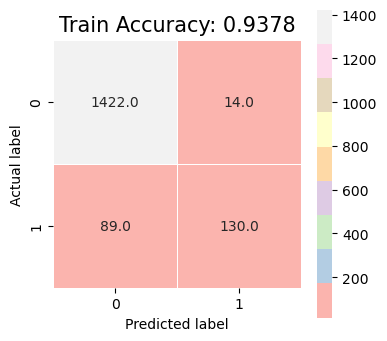

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1436
           1       0.90      0.59      0.72       219

    accuracy                           0.94      1655
   macro avg       0.92      0.79      0.84      1655
weighted avg       0.94      0.94      0.93      1655



In [84]:
# Computing the confusion matrix for the train subset

from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_train, y_train_pred) # Compute the train confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Train Subset: \n\n',classification_report(y_train, y_train_pred))


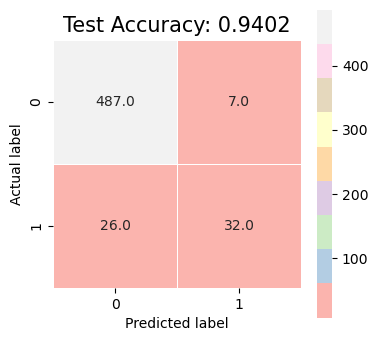

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       494
           1       0.82      0.55      0.66        58

    accuracy                           0.94       552
   macro avg       0.88      0.77      0.81       552
weighted avg       0.94      0.94      0.93       552



In [85]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred) # Compute the test confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Test Subset: \n\n',classification_report(y_test, y_test_pred))


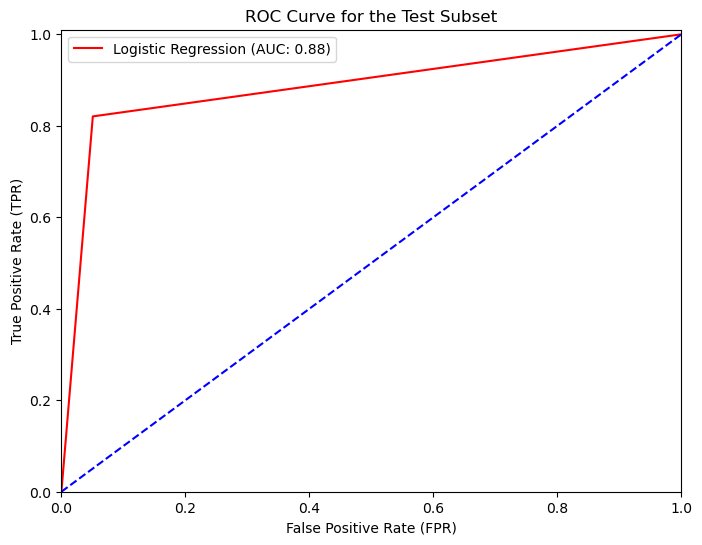

In [86]:
 # Plotting the ROC curve for the test subset
    
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' from sklearn
fpr, tpr, thresholds = roc_curve(y_test_pred, y_test) # Computing ROC for the test subset
auc(fpr, tpr) # Computing AUC for the test subset
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

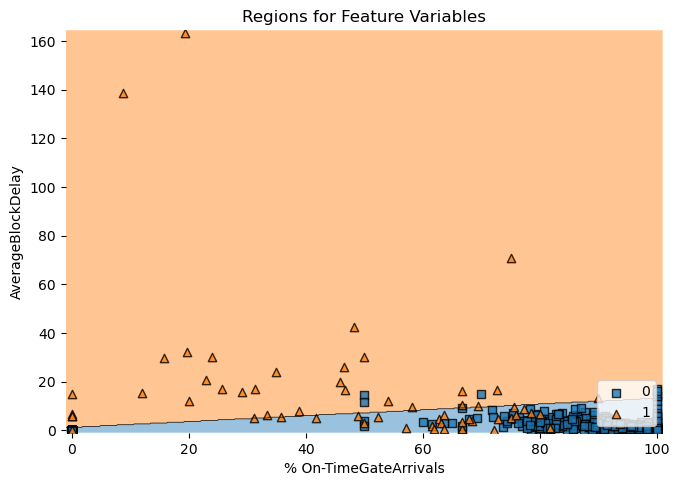

In [88]:
# Plotting the decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions
mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=logreg) #Plotting the decision region
plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay')
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()
## 0: No Rain
## 1: Rain

Reeference from Lecture Notes - 8

(d) Construct a support vector classifier to perform the classification task. Now use a couple of different kernels to construct support vector machines for the classification task at
hand. In each case, calculate the accuracy metrics and present your assessment of each
classifier. Define a range for the relevant hyperparameters and employ GridSearchCV to
find the optimal choice of hyperparameters in the specified range. Rerun the classifiers
with the optimal choices of hyperparameters and compare the performance of your classifier with the case where hyperparameters were not tuned. Plot the decision regions in
the feature space.


In [89]:
 # We start by training an SVC
    
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [90]:
# Finding the predictions of SVC classifier for train and test subsets
train_y_pred = svc_clf.predict(X_train)
test_y_pred = svc_clf.predict(X_test)

In [91]:
print(train_y_pred)
print(train_y_pred.shape[0])

[0 0 0 ... 0 0 0]
1655


In [92]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [93]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('SVC Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('SVC Classifier Test Classification Report: \n\n', test_report)

SVC Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1436
           1       0.90      0.69      0.78       219

    accuracy                           0.95      1655
   macro avg       0.93      0.84      0.88      1655
weighted avg       0.95      0.95      0.95      1655
 


SVC Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.98      0.97       494
           1       0.81      0.59      0.68        58

    accuracy                           0.94       552
   macro avg       0.88      0.79      0.82       552
weighted avg       0.94      0.94      0.94       552



In [94]:
# Constructing a bagged-SVC classifier
bag_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=3)
bag_clf.fit(X_train, y_train)

NameError: name 'BaggingClassifier' is not defined

(e) Construct a Gaussian naive Bayes classifier for the classification task at hand. Calculate the relevant accuracy metrics and plot the decision regions in the feature space.
Investigate whether (and to what extent) the underlying assumptions of the naive Bayes
algorithm are fulfilled. Explain the validity of the assumptions in this case, and explain
whether you trust the results obtained from this classifier.

In [95]:
# Importing 'GaussianNB' from naive_bayes module
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB() # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train) # Fitting the training data

GaussianNB()

In [96]:
 # Finding the predictions of the model for the train and test subsets
train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [97]:
print(train_y_pred)
print(train_y_pred.shape[0])

[0 0 0 ... 0 0 0]
1655


In [98]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [99]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1436
           1       0.64      0.63      0.64       219

    accuracy                           0.91      1655
   macro avg       0.79      0.79      0.79      1655
weighted avg       0.90      0.91      0.90      1655
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.92      0.94       494
           1       0.47      0.60      0.53        58

    accuracy                           0.89       552
   macro avg       0.71      0.76      0.73       552
weighted avg       0.90      0.89      0.89       552



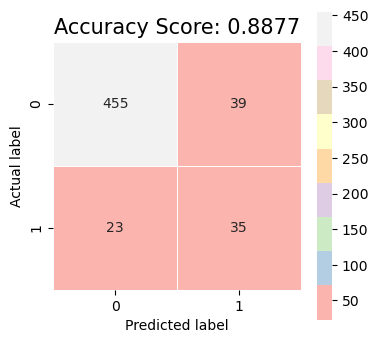

In [100]:
# Computing the confusion matrix

gnb_c_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(gnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

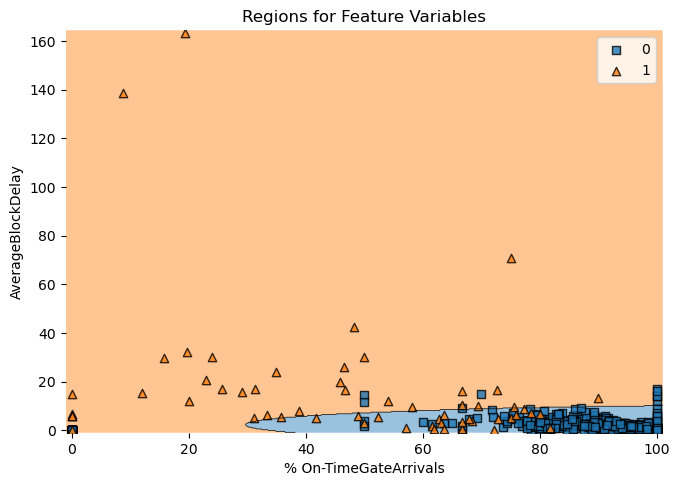

In [101]:
# Plotting the decision regions

import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=gnb_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

Reference from Lecture Notes - 6

(f) Construct an LDA classifier and carefully assess its performance. Plot the decision
regions in the feature space.

In [102]:
 # Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module
    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis() # Instantiating the lda classifier
lda_clf.fit(X_train, y_train) # Fitting the train data

LinearDiscriminantAnalysis()

In [103]:
# Finding the predictions of the lda classifier for train and test subsets
train_y_pred = lda_clf.predict(X_train)
test_y_pred = lda_clf.predict(X_test)

In [104]:
print(train_y_pred)
print(train_y_pred.shape[0])

[0 0 0 ... 0 0 0]
1655


In [105]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [106]:
 train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1436
           1       0.67      0.54      0.60       219

    accuracy                           0.90      1655
   macro avg       0.80      0.75      0.77      1655
weighted avg       0.90      0.90      0.90      1655
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.93      0.94       494
           1       0.48      0.52      0.50        58

    accuracy                           0.89       552
   macro avg       0.71      0.73      0.72       552
weighted avg       0.89      0.89      0.89       552



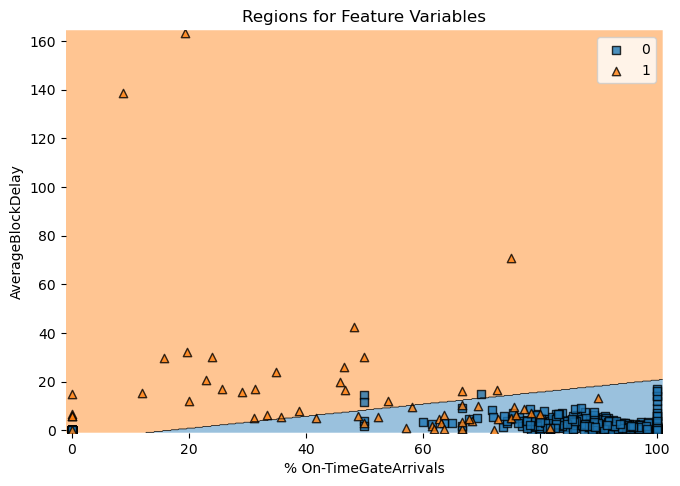

In [107]:
# Plotting the decision regions

import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=lda_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

Reference from Lecture Notes - 6

(g) Construct a decision tree classifier for the classification task at hand. Initially do NOT
tune any of the hyperparameters of the tree. Does your tree suffer from overfitting?
Use GridSearchCV and tune some of the hyperparameters of your tree to cure the high
variance. Calculate the relevant accuracy metrics after tuning the hyperparameters of
your tree. How successful were you in curing the high variance?

In [108]:
from sklearn import tree                # Importing 'tree' module from sklearn

# Constructing tree classifier with no specified hyperparameters

tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
 # Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)


In [110]:
print(train_y_pred)
print(train_y_pred.shape[0])

[0 0 0 ... 0 0 0]
1655


In [111]:
print(test_y_pred)
print(test_y_pred.shape[0])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [112]:
 train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣ accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣ classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1436
           1       1.00      0.96      0.98       219

    accuracy                           0.99      1655
   macro avg       0.99      0.98      0.99      1655
weighted avg       0.99      0.99      0.99      1655
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.97      0.97       494
           1       0.74      0.69      0.71        58

    accuracy                           0.94       552
   macro avg       0.85      0.83      0.84       552
weighted avg       0.94      0.94      0.94       552



6. Ensemble Methods Applied to Regression Problems: Consider the same dataset (GateArrivalDelay.csv) in problem 4 of HW 1. Use one of the ensemble learning methods for regression (e.g. random forest regressor, gradient boosting regressor, extreme boostingregressor) to construct a model whose accuracy (R2-score) beats the highest accuracy you could achieve in HW 1. Make sure that the model you construct in this problem is not suffering from a severe high variance problem.

In [ ]:
import numpy as np

gadelay_df=pd.read_csv('C:/Users/manis/OneDrive/Documents/DATA-602 - Data Analysis & ML/Assignment - 1/GateArrivalDelay.csv')
gadelay_df

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x=gadelay_df[["% On-TimeGateArrivals","AverageBlockDelay"]] # Features 
y=gadelay_df[["AverageGateArrivalDelay"]] # Target Variable


X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()  # Instantiating GradientBoostingRegressor
gb_reg.fit(X_train, y_train)   

In [ ]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [ ]:
print(train_y_pred)
print(train_y_pred.shape[0])

In [ ]:
print(test_y_pred)
print(test_y_pred.shape[0])

In [ ]:
r2_train_score = gb_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')


In [ ]:
 # Setting new hyperparameters for gradient boosting regressor
gb_params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 15,'learning_rate': 0.01}
gb_reg = GradientBoostingRegressor(**gb_params) # Applying the new hyperparameters
gb_reg.fit(X_train, y_train) # Fitting the train data

In [ ]:
 # Finding the predictions of gradient boosting regressor for train and test subsets
train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [ ]:
print(train_y_pred)
print(train_y_pred.shape[0])

In [ ]:
print(test_y_pred)
print(test_y_pred.shape[0])

In [ ]:
r2_train_score = gb_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

Analysis
My HW1 r2 scores were as follows
R2 score of Train data is : 0.6488
R2 score of Test data is : 0.7108
I have implemented gradient boosting ensemble method and my R2 scores are as follows
R^2 score for train dataset = 0.9202
R^2 score for test dataset = 0.7852
After initializing hyperparameters with values ('n_estimators': 2000, 'max_depth': 7, 'min_samples_split': 15, 'learning_rate': 0.001)
My new R2 scores are as follows
R^2 score for train dataset = 0.9502
R^2 score for test dataset = 0.7851
Variance score got reduced after adding hyperparameters and my new R2 score is more accurate than previous homeowrk with less variance.

Reference from Lecture Notes - 8 and Assignment - 1

questions pending - 5 (c), (d), (e),  , 6